In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from Models.Charts import Charts
from Models.Enunciados import Enunciados

/home/guille/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
file = 'datos/avocado.csv'
chart = Charts(file)
# FILTRAMOS POR LAS 10 REGIONES CON MAS VOLUMEN DE VENTAS
chart.topRegions(num=10,exclude='TotalUS')
#Hacemos una limpieza la columna Unnamed
chart.clearData('Unnamed: 0')
# Comprobamos si hay valores nulos
chart.isNull()
chart.showData()
enun = Enunciados()
chart.df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
312,2015-12-27,0.90,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,1090140.07,110737.35,11829.59,conventional,2015,California
313,2015-12-20,0.94,4695737.21,1676601.43,1543280.76,266689.82,1209165.20,1061703.58,136747.10,10714.52,conventional,2015,California
314,2015-12-13,0.87,5259354.30,1806690.08,1627240.76,232985.13,1592438.33,1404012.00,180150.37,8275.96,conventional,2015,California
315,2015-12-06,0.78,5775536.27,1943065.50,2100246.17,221957.26,1510267.34,1376640.91,126664.37,6962.06,conventional,2015,California
316,2015-11-29,0.91,4575710.62,1461699.38,1810202.70,222311.07,1081497.47,991568.84,82338.39,7590.24,conventional,2015,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18232,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
18234,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
18235,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West


1.1 | **Descomposición de Series Temporales de Precios:** 
   
**Uso de Datos:** Usa la columna `AveragePrice` y `Date`.
   - **Esperado:** Utiliza la función `seasonal_decompose` de la librería `statsmodels` para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido. 
     - Convierte `Date` a tipo datetime usando `pd.to_datetime()`.
     - Agrupa los datos por `Date` y calcula el promedio de `AveragePrice` utilizando `groupby()` si es necesario.
     - Visualiza los componentes descompuestos usando `matplotlib` para cada uno de ellos.


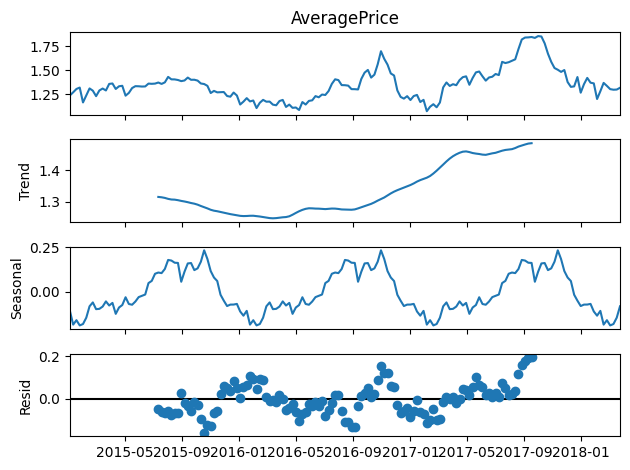

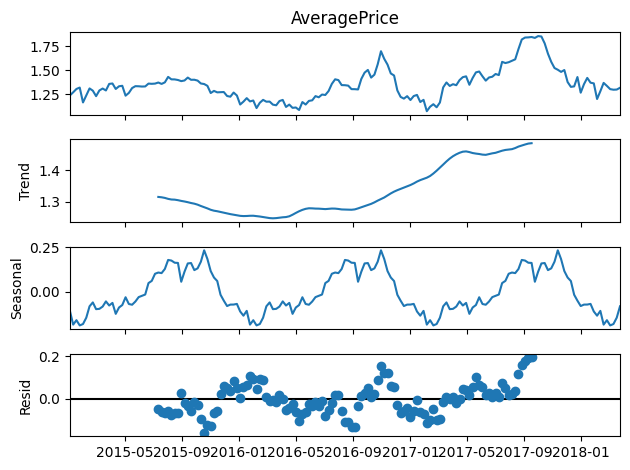

In [3]:
enun.getEnunciado("1.1")
promedio_por_fecha = chart.df.groupby('Date')['AveragePrice'].mean()
descomposicion = chart.seasonal_decompose(promedio_por_fecha, model='additive',period=54)
descomposicion.plot()

1.2 | **Análisis de Estacionalidad por Región:** 
   
**Análisis de Estacionalidad por Región:** 
   - **Uso de Datos:** Usa las columnas `AveragePrice`, `Date` y `Total Volume`.
   - **Esperado:** Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
     - Agrupa los datos por `region` y `Date` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada región.
     - Representa gráficamente las tendencias utilizando `plt.plot()` de `matplotlib`.


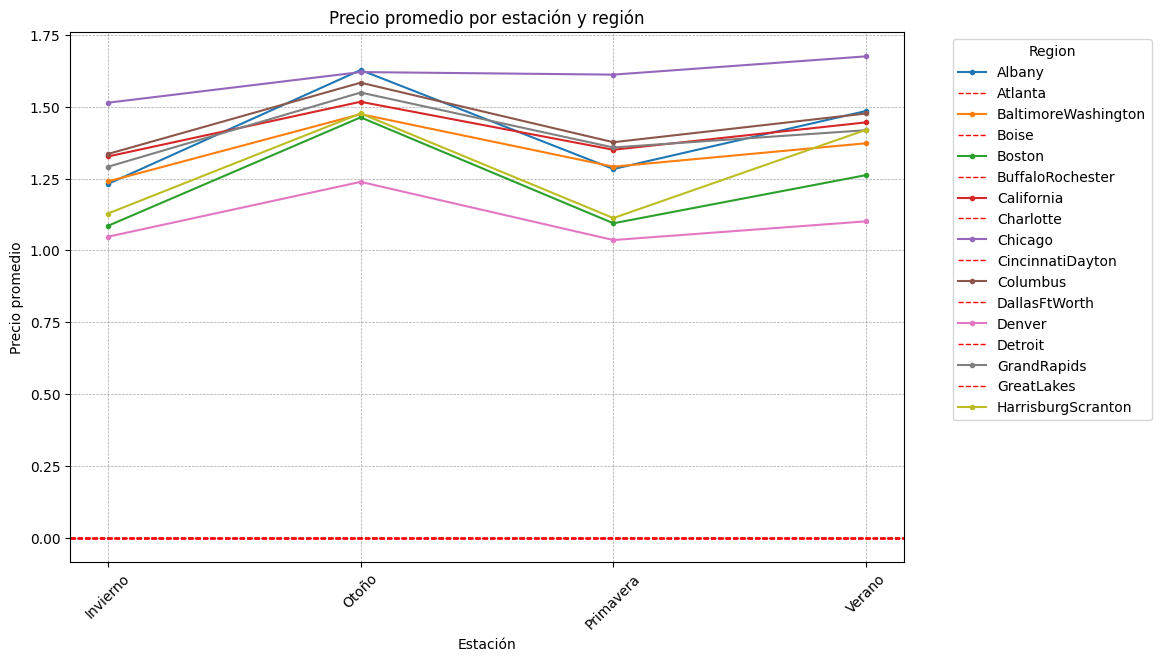

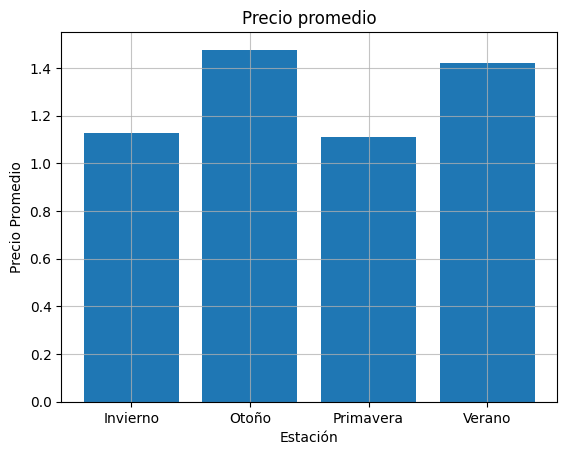

1.2 Explicación: | - **Cada línea representa una región específica y permite observar las tendencias estacionales en los precios. 
 - **Por ejemplo, se pueden identificar picos o caídas en precios en ciertas épocas, lo que refleja la oferta y demanda.

In [4]:
enun.getEnunciado("1.2")
chart.df['year'] = chart.df['Date'].dt.year
chart.df['month'] = chart.df['Date'].dt.month
chart.df['season'] = chart.df['month'].apply(chart.temporada)

promedio_anual = chart.df.groupby(['region', 'season'])['AveragePrice'].mean().reset_index()
chart.figureConfig(10,6)

# Itera sobre cada región para graficar su línea
for region in promedio_anual['region'].unique():
    region_data = promedio_anual[promedio_anual['region'] == region]
    chart.plot(region_data['season'], region_data['AveragePrice'],
               title='Precio promedio por estación y región',
               xlabel="Estación",ylabel="Precio promedio",marker=".",show=False)

chart.show()
chart.plot_bar(region_data['season'],region_data['AveragePrice'],title="Precio promedio",xlabel="Estación",ylabel="Precio Promedio")
enun.getExplicacion("1.2")

1.3 | **Comparación de Precios Promedio Mensuales:** 
   
**Uso de Datos:** Usa las columnas `AveragePrice` y `Date`.
   - **Esperado:** Calcula y compara los precios promedio mensuales.
     - Agrupa los datos por mes usando `pd.Grouper` con `freq='M'`.
     - Calcula el promedio de `AveragePrice` para cada mes con `mean()`.
     - Visualiza los resultados con un gráfico de líneas usando `plt.plot()`.


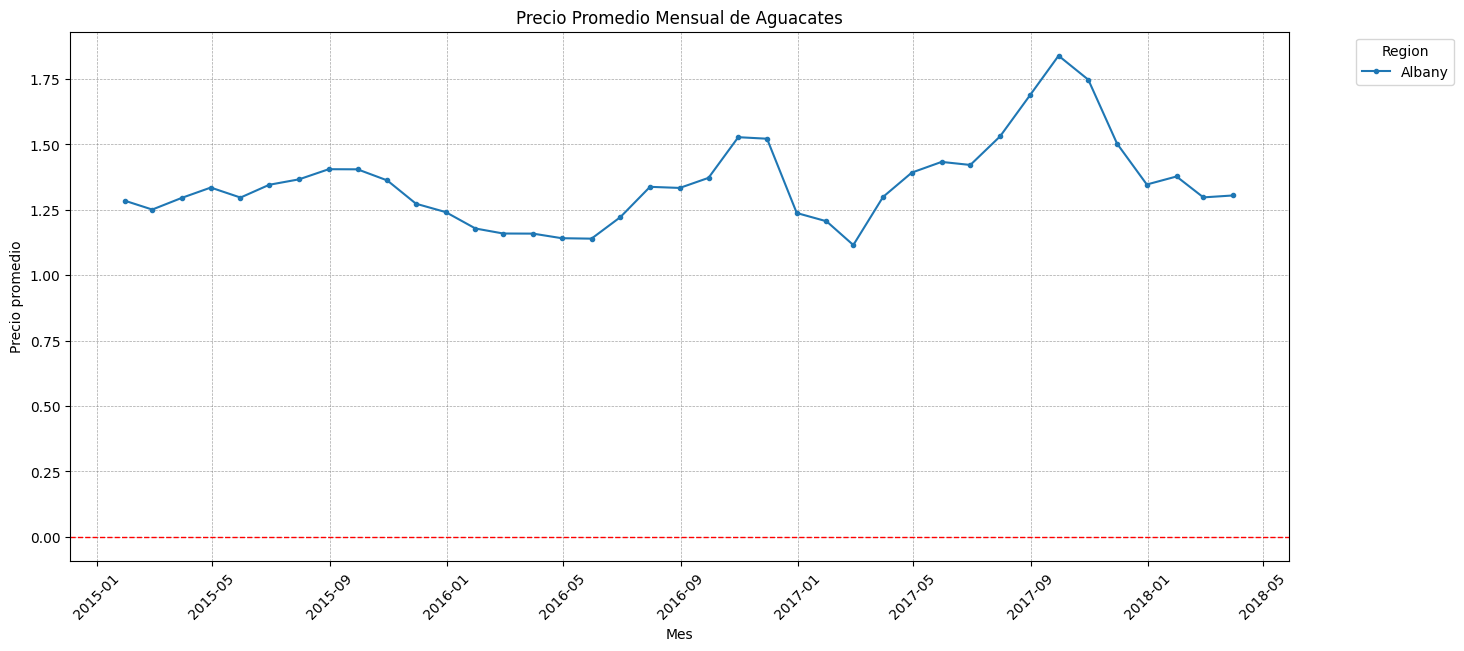

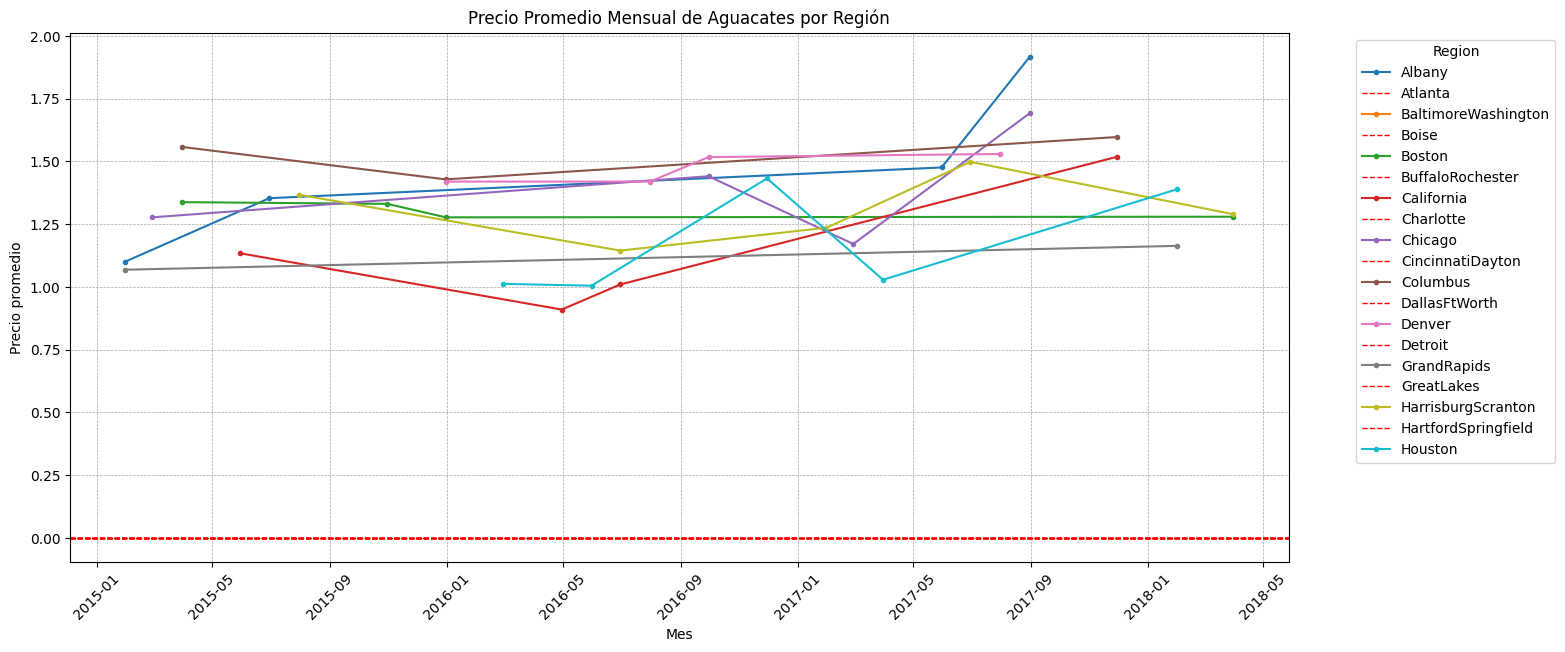

1.3 Explicación: | 

In [5]:
enun.getEnunciado("1.3")
promedio_mensual = chart.df.groupby(pd.Grouper(key='Date', freq='ME'))['AveragePrice'].mean().reset_index()

# Graficar el promedio mensual de AveragePrice
chart.figureConfig(14,6)
chart.plot(promedio_mensual['Date'], promedio_mensual['AveragePrice'],
               title='Precio Promedio Mensual de Aguacates',label='Precio Promedio Mensual',
               xlabel="Mes",ylabel="Precio promedio",marker=".",show=True)

# Ahora agrupar por 'region' y por mes para calcular el promedio
promedio_mensual_region = chart.df.groupby(['region', pd.Grouper(key='Date', freq='ME')])['AveragePrice'].mean().reset_index()

# Tamaño de la figura para el gráfico por región
chart.figureConfig(14,6)

promedio_mensual_region['region'] = promedio_mensual_region['region'].fillna(0).sample(frac=0.1)
# Graficar el promedio mensual de AveragePrice por región
for region in promedio_mensual_region['region'].unique():
    region_data = promedio_mensual_region[promedio_mensual_region['region'] == region]
    chart.plot(region_data['Date'], region_data['AveragePrice'],
               title='Precio Promedio Mensual de Aguacates por Región',label=region,
               xlabel="Mes",ylabel="Precio promedio",marker=".",show=False)
    
# Mostrar el gráfico
chart.show()
enun.getExplicacion("1.3")

1.4 | **Tendencia de Ventas a lo Largo del Tiempo:** 
   
- **Uso de Datos:** Usa las columnas `Total Volume` y `Date`.
   - **Esperado:** Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
     - Agrupa los datos por `Date` y suma el `Total Volume` usando `groupby()`.
     - Visualiza los resultados usando un gráfico de líneas con `plt.plot()` para mostrar la tendencia.


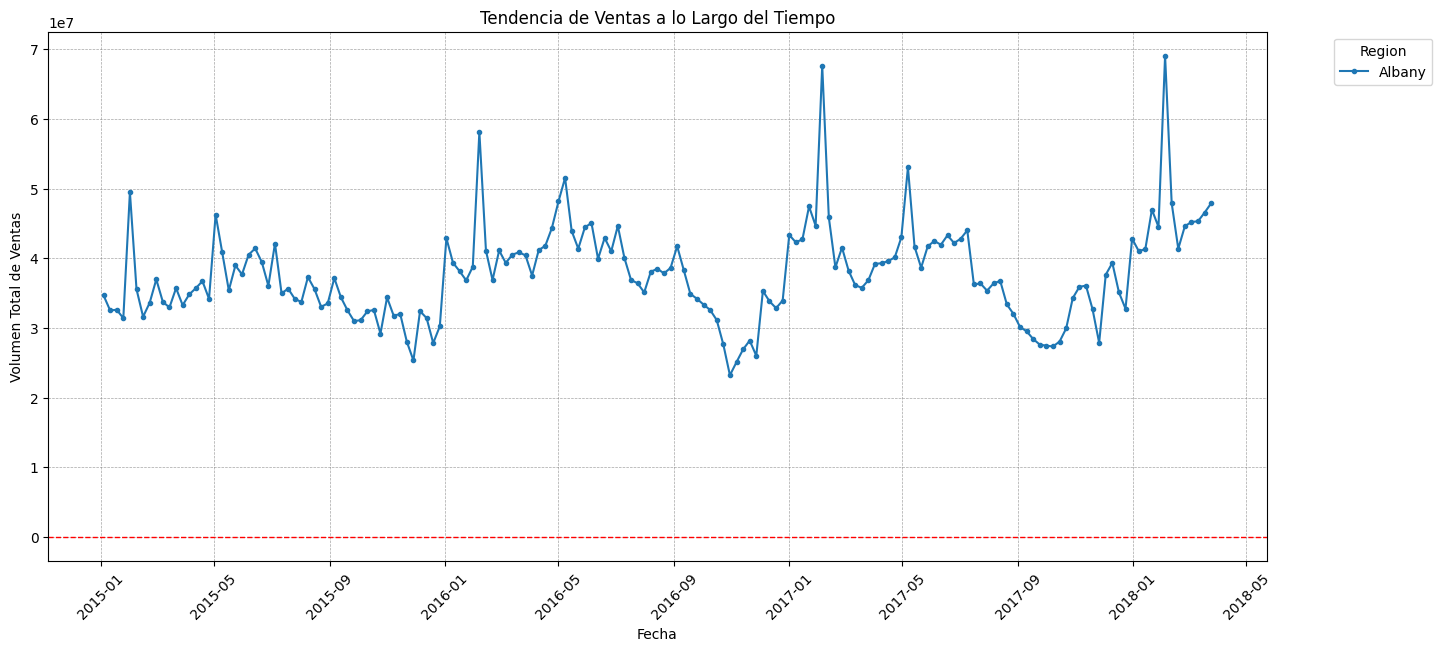

In [6]:
enun.getEnunciado("1.4")
# Agrupar por fecha y sumar el volumen total
df_grouped = chart.df.groupby('Date').agg({
    'Total Volume':'sum'
})

chart.figureConfig(14,6)
chart.plot(df_grouped.index, df_grouped.values,
               title='Tendencia de Ventas a lo Largo del Tiempo',label='Volumen Total',
               xlabel="Fecha",ylabel="Volumen Total de Ventas",marker=".",show=True)


1.5 | **Análisis de Cambios en Precios Anuales:** 
   
**Análisis de Cambios en Precios Anuales:**
   - **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Observa las diferencias anuales en los precios promedio.
     - Agrupa los datos por `year` utilizando `groupby()`.
     - Calcula el promedio de `AveragePrice` para cada año.
     - Representa los resultados en un gráfico de barras usando `plt.bar()` que compare los precios de cada año.


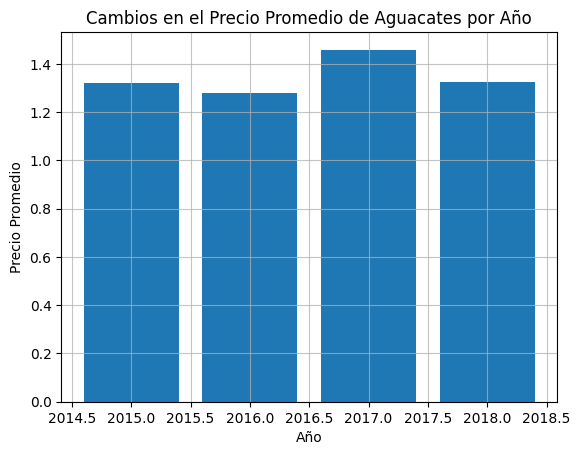

In [7]:
enun.getEnunciado("1.5")
promedio_year =  chart.df.groupby('year')['AveragePrice'].mean().reset_index()
chart.plot_bar(promedio_year['year'], promedio_year['AveragePrice'],title="Cambios en el Precio Promedio de Aguacates por Año",xlabel="Año",ylabel="Precio Promedio")

2.1 | **Gráfico de Violín de Volumen de Ventas por Región:** 
   
- **Uso de Datos:** Usa las columnas `Total Volume` y `region`.
   - **Esperado:** Visualiza la distribución de ventas en diferentes regiones.
     - Utiliza la función `violinplot` de `seaborn` para crear gráficos de violín.
     - Configura los ejes para mostrar la relación entre `Total Volume` y `region`.
     - Añade etiquetas y títulos usando `plt.title()` y `plt.xlabel()` para facilitar la interpretación.


2.1 Explicación: | 

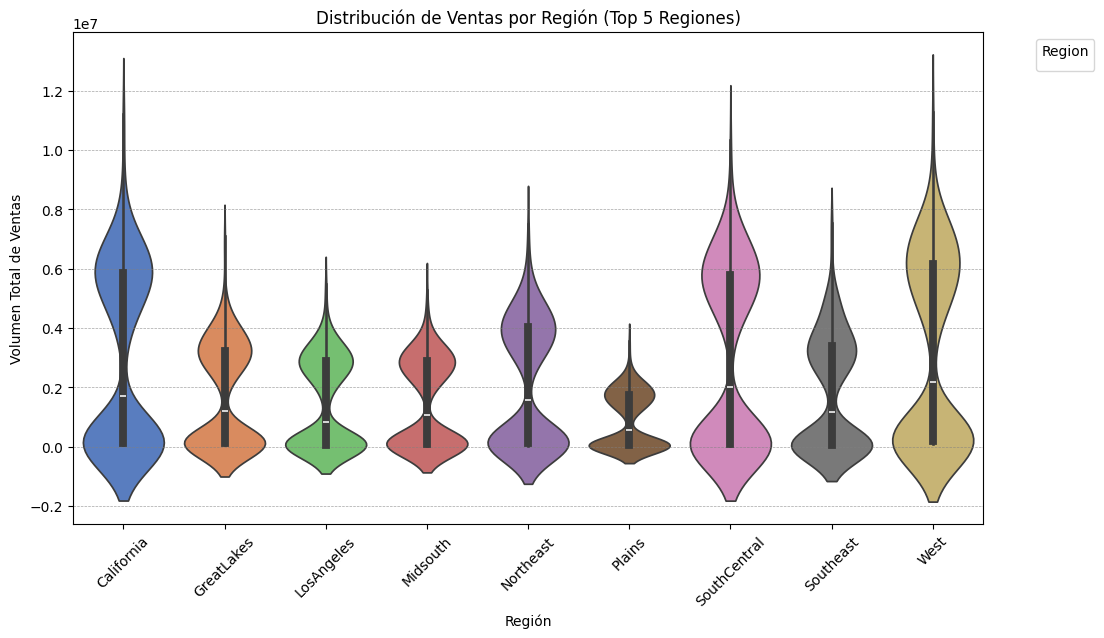

In [8]:
enun.getEnunciado("2.1")
chart.figureConfig(title="Distribución de Ventas por Región (Top 5 Regiones)",xlabel="Región",ylabel="Volumen Total de Ventas")
sns.violinplot(x='region', y='Total Volume', data=chart.df, hue='region', palette="muted", dodge=False, legend=False)

enun.getExplicacion("2.1")

2.2 | **Boxplot Comparativo de Precios entre Años:** 
   
- **Uso de Datos:** Usa las columnas `AveragePrice` y `year`.
   - **Esperado:** Genera boxplots para comparar la distribución de precios.
     - Utiliza `boxplot` de `seaborn` para crear boxplots que comparen `AveragePrice` entre diferentes años.
     - Asegúrate de que cada boxplot represente un año diferente.
     - Incluye etiquetas y títulos descriptivos usando `plt.title()`.


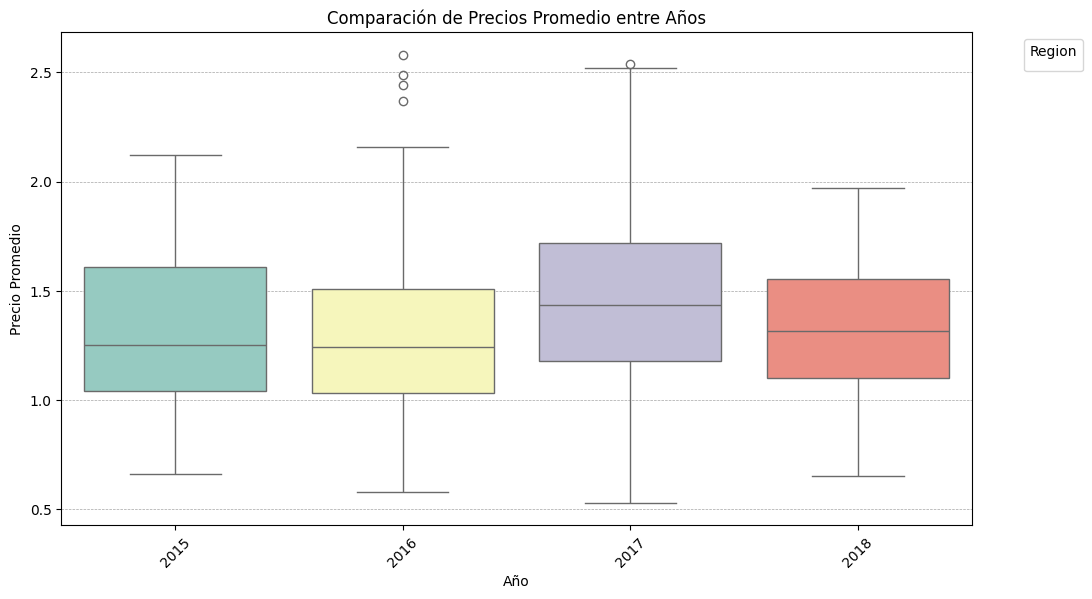

In [9]:
enun.getEnunciado("2.2")
chart.figureConfig(title='Comparación de Precios Promedio entre Años',ylabel='Precio Promedio',xlabel='Año')
sns.boxplot(x='year', y='AveragePrice', data=chart.df, palette="Set3", hue='year', legend=False)
chart.show()

2.3 | **Histograma de Volumen Total de Ventas:** 
   
 - **Uso de Datos:** Usa la columna `Total Volume`.
   - **Esperado:** Crea un histograma para mostrar la distribución del volumen total de ventas.
     - Utiliza `hist()` de `matplotlib` para crear el histograma.
     - Ajusta el número de bins para una visualización clara usando el parámetro `bins`.
     - Añade etiquetas y un título que describa lo que se muestra.


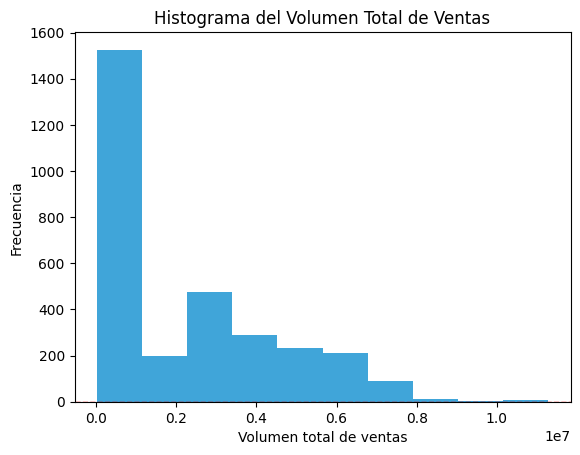

In [10]:
enun.getEnunciado("2.3")

chart.plot_hist(chart.df['Total Volume'],
                title="Histograma del Volumen Total de Ventas",
                xlabel="Volumen total de ventas",
                ylabel="Frecuencia",
                color='#4fb9ea',
                alpha=0.7)

2.4 | **Gráfico de Barras de Ventas por Tipo de Bolsa:** 
   
- **Uso de Datos:** Utiliza las columnas `Total Bags`, `Small Bags`, `Large Bags` y `XLarge Bags`.
   - **Esperado:** Compara las ventas de diferentes tipos de bolsas.
     - Suma los volúmenes de ventas por tipo de bolsa utilizando `sum()`.
     - Crea un gráfico de barras con `plt.bar()` para mostrar las diferencias en ventas.
     - Asegúrate de incluir etiquetas para cada tipo de bolsa.


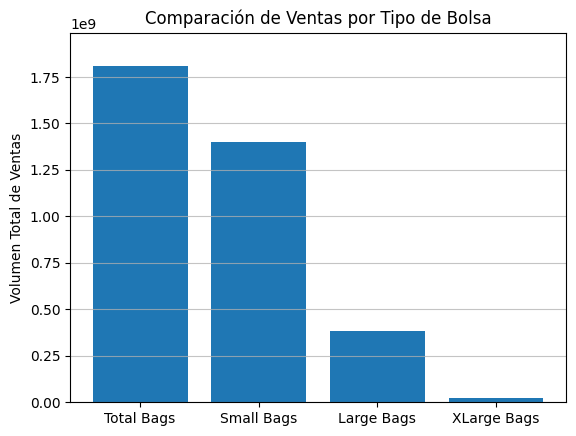

2.4 Explicación: | 

In [11]:
enun.getEnunciado("2.4")
total_bags = chart.df['Total Bags'].sum()
small_bags = chart.df['Small Bags'].sum()
large_bags = chart.df['Large Bags'].sum()
xlarge_bags = chart.df['XLarge Bags'].sum()
total_volume = chart.df['Total Volume']
# Crear una lista de tipos de bolsas y sus correspondientes ventas
labels = ['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
sales = [total_bags, small_bags, large_bags, xlarge_bags]
# Crear el gráfico de barras
chart.plot_bar(labels,
               sales,
               title="Comparación de Ventas por Tipo de Bolsa",
               xlabel="",
               ylabel="Volumen Total de Ventas",
               ylim=(0, max(sales) * 1.1),
               axis='y', alpha=0.75)

enun.getExplicacion("2.4")

2.5 | **Gráfico de Líneas de Precios Promedios por Año:** 
   
- **Uso de Datos:** Utiliza las columnas `AveragePrice` y `year`.
   - **Esperado:** Visualiza la tendencia de precios promedio a lo largo de los años.
     - Agrupa los datos por `year` y calcula el promedio de `AveragePrice`.
     - Usa `plt.plot()` para crear un gráfico de líneas que muestre la evolución de precios.
     - Añade un título y etiquetas descriptivas a los ejes usando `plt.title()` y `plt.xlabel()`.


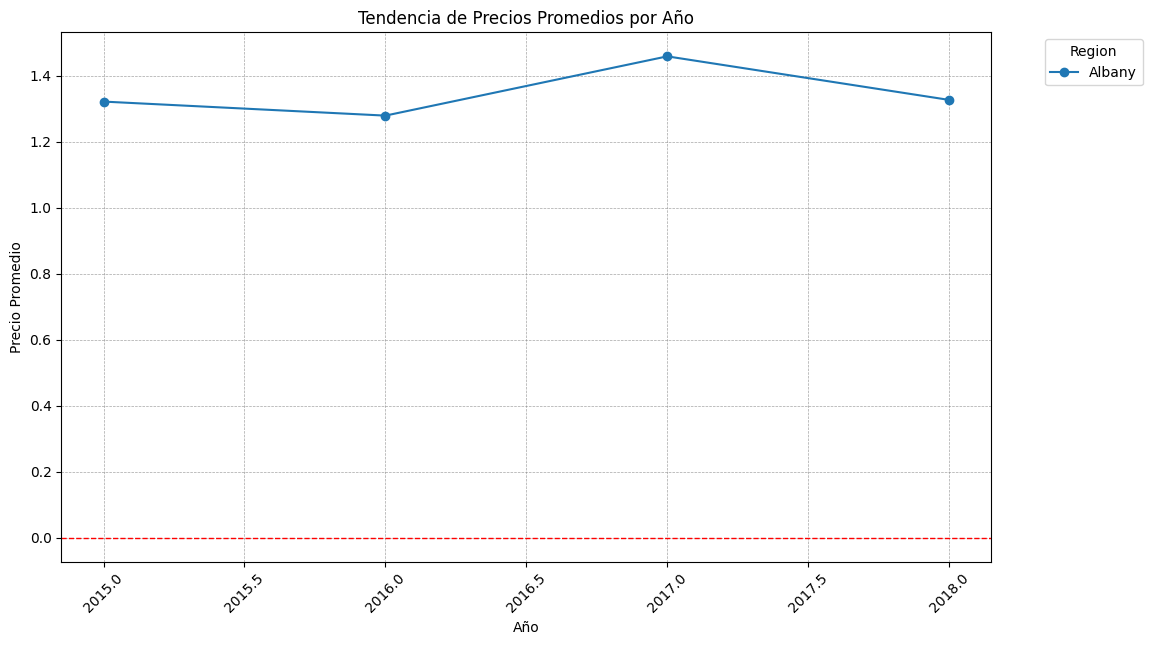

2.5 Explicación: | 

In [13]:
enun.getEnunciado("2.5")
# Extraer el año de la columna de fecha
chart.df['year'] = chart.df['Date'].dt.year
# Agrupar por año y calcular el promedio de AveragePrice
precios_promedio_anual = chart.df.groupby('year')['AveragePrice'].mean().reset_index()
# Crear el gráfico de líneas
chart.figureConfig()
chart.plot(precios_promedio_anual['year'], 
           precios_promedio_anual['AveragePrice'], 
           title="Tendencia de Precios Promedios por Año",
           xlabel="Año",
           ylabel="Precio Promedio",
           marker='o')
# plt.xticks(precios_promedio_anual['year'])  # Para mostrar todos los años en el eje x

enun.getExplicacion("2.5")

In [ ]:
enun.getEnunciado("3.1")

# Añadir columna 'year'
chart.df['year'] = chart.df['Date'].dt.year

# Agrupar por año y calcular la suma de Total Volume y el promedio de AveragePrice
yearly_data = chart.df.groupby('year').agg(
    {
        'Total Volume': 'sum', 
        'AveragePrice': 'mean'
    }
).reset_index()

# Calcular la variación porcentual
yearly_data['Volume_pct_change'] = yearly_data['Total Volume'].pct_change()
yearly_data['Price_pct_change'] = yearly_data['AveragePrice'].pct_change()

print(yearly_data)
# Calcular la elasticidad
yearly_data['Elasticity'] = (yearly_data['Volume_pct_change'] / yearly_data['Price_pct_change']).fillna(0)
print(yearly_data['Elasticity'])

# Visualizar resultados
chart.plot(yearly_data['year'], yearly_data['Elasticity'], 
           title='Elasticidad Precio-Demanda por Año',xlabel='Año',ylabel='Elasticidad',marker='o',show=True)


#   # Línea de referencia
enun.getExplicacion("3.1")

In [ ]:
enun.getEnunciado("3.2")
chart.df['Date'] = pd.to_datetime(chart.df['Date'])
chart.df['year'] = chart.df['Date'].dt.year

# Agrupamos por 'region' y 'year' y calculamos el volumen total y precio promedio anual
df_grouped = chart.df.groupby(['region', 'year']).agg(
    {
        'Total Volume': 'sum', 
        'AveragePrice': 'mean'
    }
).reset_index()

# Calculamos el cambio porcentual por región para 'Total Volume' y 'AveragePrice'
df_grouped['pct_change_volume'] = df_grouped.groupby('region')['Total Volume'].pct_change()
df_grouped['pct_change_price'] = df_grouped.groupby('region')['AveragePrice'].pct_change()


# Calculamos la elasticidad para cada región y año
df_grouped['elasticity'] = df_grouped['pct_change_volume'] / df_grouped['pct_change_price']

# Filtramos los valores NaN que pueden haber resultado del cálculo de pct_change en los primeros valores
df_elasticity = df_grouped.dropna(subset=['elasticity'])

chart.figureConfig(title="Comparación de Elasticidad en Diferentes Mercados",xlabel="Year",ylabel="Elasticidad")
for region in df_elasticity['region'].unique():
    region_data = df_elasticity[df_elasticity['region'] == region]
    plt.plot(region_data['year'],region_data['elasticity'],label=region_data['region'])


plt.show()



In [ ]:
# Continuacion 3.2
# Presenta un gráfico de barras que muestre la elasticidad por región usando plt.bar().

chart.df['Date'] = pd.to_datetime(chart.df['Date'])
chart.df['year'] = chart.df['Date'].dt.year

# Agrupo por año y región, y calcula el promedio de 'AveragePrice' y la suma de 'Total Volume'
el_price_vs_demanda = chart.df.groupby(['year', 'region']).agg({
    'Total Volume': 'sum',
    'AveragePrice': 'mean'
}).reset_index()

# Calcula el cambio porcentual de volumen y precio para cada región
# pct_change() es Cambio porcentual

el_price_vs_demanda['pct_change_volume'] = el_price_vs_demanda.groupby('region')['Total Volume'].pct_change().fillna(0)
el_price_vs_demanda['pct_change_price'] = el_price_vs_demanda.groupby('region')['AveragePrice'].pct_change().fillna(0)

# Calcula la elasticidad como el cociente entre el cambio porcentual de volumen y de precio
el_price_vs_demanda['elasticidad'] = el_price_vs_demanda['pct_change_volume'] / el_price_vs_demanda['pct_change_price']

# Filtra regiones sin valores NaN en elasticidad
elasticidad_por_region = el_price_vs_demanda.dropna(subset=['elasticidad'])

# Agrupa por región para obtener la elasticidad promedio de cada región
elasticidad_media_por_region = elasticidad_por_region.groupby('region')['elasticidad'].mean().reset_index()

# Graficar elasticidad promedio por región
chart.figureConfig(11, 7,title="Elasticidad Precio-Demanda por Región",xlabel="Región",ylabel="Elasticidad Precio-Demanda Promedio")
plt.bar(elasticidad_media_por_region['region'], elasticidad_media_por_region['elasticidad'], color='skyblue')
plt.xticks(rotation=90)
plt.show()
enun.getExplicacion("3.2")

In [ ]:
enun.getEnunciado("3.3")
chart.df['year'] = chart.df['Date'].dt.year
# Agrupar por año y sumar volúmenes para cada tipo de bolsa y calcular el precio promedio
df_grouped = chart.df.groupby('year').agg(
    {
        'AveragePrice': 'mean',
        'Small Bags': 'sum',
        'Large Bags': 'sum',
        'XLarge Bags': 'sum'
    }
).reset_index()

# Calcular el cambio porcentual anual para cada tipo de bolsa y el precio promedio
df_grouped['pct_change_price'] = df_grouped['AveragePrice'].pct_change()
df_grouped['pct_change_small'] = df_grouped['Small Bags'].pct_change()
df_grouped['pct_change_large'] = df_grouped['Large Bags'].pct_change()
df_grouped['pct_change_xlarge'] = df_grouped['XLarge Bags'].pct_change()

# Calcular la elasticidad para cada tipo de bolsa
df_grouped['elasticity_small'] = df_grouped['pct_change_small'] / df_grouped['pct_change_price']
df_grouped['elasticity_large'] = df_grouped['pct_change_large'] / df_grouped['pct_change_price']
df_grouped['elasticity_xlarge'] = df_grouped['pct_change_xlarge'] / df_grouped['pct_change_price']

# Filtrar valores NaN resultantes de pct_change()
df_elasticity = df_grouped.dropna(subset=['elasticity_small', 'elasticity_large', 'elasticity_xlarge'])

# Visualizar los resultados en un gráfico de barras
chart.figureConfig(title="Elasticidad Precio-Demanda por Tipo de Bolsa",xlabel="Año",ylabel="Elasticidad Precio-Demanda")
plt.bar(df_elasticity['year'] - 0.2, df_elasticity['elasticity_small'], width=0.2, label='Small Bags')
plt.bar(df_elasticity['year'], df_elasticity['elasticity_large'], width=0.2, label='Large Bags')
plt.bar(df_elasticity['year'] + 0.2, df_elasticity['elasticity_xlarge'], width=0.2, label='XLarge Bags')

# Configuración del gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
enun.getExplicacion("3.3")

In [ ]:
enun.getEnunciado("3.3")
gp_avocado_type =  chart.df.groupby(['type']).agg({
    'AveragePrice':'mean',
    'Total Volume' : 'sum'
}).reset_index()


gp_avocado_type['pct_av_change_price'] =   gp_avocado_type['AveragePrice'].pct_change().fillna(0)
gp_avocado_type['pct_av_change_volume'] =   gp_avocado_type['Total Volume'].pct_change().fillna(0)


print(gp_avocado_type)
gp_avocado_type['elasticity'] = (gp_avocado_type['pct_av_change_price']  / gp_avocado_type['pct_av_change_volume']).fillna(0)
gp_avocado_type.dropna(subset=['AveragePrice','Total Volume'])


# Separar los datos para facilitar la visualización
elasticity_organic = gp_avocado_type[gp_avocado_type['type'] == 'organic']
elasticity_conventional = gp_avocado_type[gp_avocado_type['type'] == 'conventional']

chart.figureConfig(title="Elasticidad Precio-Demanda por Tipo de Bolsa",xlabel="Año",ylabel="Elasticidad Precio-Demanda")
plt.bar(elasticity_organic['type'], elasticity_organic['elasticity'], color='orange',label="Organico")
plt.bar(elasticity_conventional['type'], elasticity_conventional['elasticity'], color='orange',label="Conventional")
plt.show()
enun.getExplicacion("3.3")

In [ ]:
enun.getEnunciado("3.5")

# Calcular la variación porcentual de AveragePrice y Total Volume
chart.df['pct_change_price'] = chart.df['AveragePrice'].pct_change().fillna(0)
chart.df['pct_change_volume'] = chart.df['Total Volume'].pct_change().fillna(0)

# Calcular la elasticidad precios-ventas
chart.df['elasticity'] = chart.df['pct_change_volume'] / chart.df['pct_change_price']

# Crear el gráfico de dispersión entre AveragePrice y Total Volume
chart.figureConfig(title="Relación entre Precio Promedio y Volumen Total de Ventas",
                   xlabel="Precio Promedio (AveragePrice)",ylabel="Volumen Total de Ventas (Total Volume)")

plt.scatter(chart.df['AveragePrice'], chart.df['Total Volume'], alpha=0.5, label='Datos')

# Ajustar una línea de tendencia para observar la relación
z = np.polyfit(chart.df['AveragePrice'], chart.df['Total Volume'], 1)
p = np.poly1d(z)
plt.plot(chart.df['AveragePrice'], p(chart.df['AveragePrice']), "r--", label='Tendencia')

# Configuración del gráfico
plt.show()
enun.getExplicacion("3.5")

In [ ]:
enun.getEnunciado("4.1")

# Agrupar los datos por trimestre y calcular el promedio de AveragePrice y la suma de Total Volume
cohortes_trimestrales = chart.df.groupby(pd.Grouper(key='Date', freq='Q')).agg(
    AveragePrice=('AveragePrice', 'mean'),
    TotalVolume=('Total Volume', 'sum')
).reset_index()


chart.figureConfig(title="Cohortes Trimestrales: Evolución de Precio Promedio y Volumen Total",
                   xlabel="Fecha",ylabel="Valores")

# Línea para precios promedio trimestrales
plt.plot(cohortes_trimestrales['Date'], cohortes_trimestrales['AveragePrice'], color='red', marker='o', label='Precio Promedio Trimestral')
# Línea para volumen total trimestral
plt.plot(cohortes_trimestrales['Date'], cohortes_trimestrales['TotalVolume'], color='blue', marker='s', label='Volumen Total Trimestral')
# Configuración del gráfico
plt.show()

In [ ]:
enun.getEnunciado("4.2")
# Agrupar los datos por región y fecha (trimestres) y calcular el promedio de precios y la suma de volumen
cohortes_region_fecha = chart.df.groupby([pd.Grouper(key='Date', freq='Q'), 'region']).agg(
    AveragePrice=('AveragePrice', 'mean'),
    TotalVolume=('Total Volume', 'sum')
).reset_index()

# Configurar el tamaño del gráfico
chart.figureConfig(title="Cohortes por Región y Fecha: Evolución de Precio Promedio y Volumen Total",
                   xlabel="Fecha",ylabel="Valores")
# Generar un gráfico de barras para cada región
for region in cohortes_region_fecha['region'].unique():
    data_region = cohortes_region_fecha[cohortes_region_fecha['region'] == region]
    
    # Crear subgráficos para cada región
    plt.bar(data_region['Date'], data_region['TotalVolume'], label=f'Volumen Total - {region}', alpha=0.7)
    plt.plot(data_region['Date'], data_region['AveragePrice'], marker='o', label=f'Precio Promedio - {region}')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)  # Leyenda fuera del gráfico para claridad
plt.show()
enun.getExplicacion("4.2")

In [ ]:
enun.getEnunciado("4.3")

bolsas_por_fecha = chart.df.groupby([pd.Grouper(key='Date', freq='ME')]).agg(
    TotalBags=('Total Bags', 'sum'),
    SmallBags=('Small Bags', 'sum'),
    LargeBags=('Large Bags', 'sum'),
    XLargeBags=('XLarge Bags', 'sum')
).reset_index()

# Crear el gráfico de líneas
# Configurar el tamaño del gráfico
chart.figureConfig(title="Evolución de Ventas por Tipo de Bolsa",
                   xlabel="Fecha",ylabel="Volumen Total de Ventas")

plt.plot(bolsas_por_fecha['Date'], bolsas_por_fecha['SmallBags'], label='Small Bags', marker='o', color='blue')
plt.plot(bolsas_por_fecha['Date'], bolsas_por_fecha['LargeBags'], label='Large Bags', marker='o', color='green')
plt.plot(bolsas_por_fecha['Date'], bolsas_por_fecha['XLargeBags'], label='XLarge Bags', marker='o', color='orange')

# Configuración del gráfico
plt.legend(title='Tipo de Bolsa')
plt.show()
enun.getExplicacion("4.3")

In [ ]:
enun.getEnunciado("4.4")
# Agrupar por region y Date, calculando el total de ventas
ventas_por_region_fecha = chart.df.groupby([pd.Grouper(key='Date', freq='ME'), 'region']).agg(
    TotalVolume=('Total Volume', 'sum')
).reset_index()

# Clasificar las regiones en cohortes según el volumen de ventas promedio total
# Calculamos el volumen promedio para cada región
volumen_promedio_por_region = ventas_por_region_fecha.groupby('region')['TotalVolume'].mean()

# Definimos las cohortes: Baja, Media, Alta en función del cuartil
cuartiles = pd.qcut(volumen_promedio_por_region, 3, labels=['Baja', 'Media', 'Alta'])

# Agregar la cohorte a cada región en el DataFrame original
ventas_por_region_fecha['Cohorte'] = ventas_por_region_fecha['region'].map(cuartiles)

# Crear el gráfico de líneas para cada cohorte
chart.figureConfig(title="Cohortes de Clientes Basadas en Ventas por Región",
                   xlabel="Fecha",ylabel="Volumen Total de Ventas")

for cohorte in ventas_por_region_fecha['Cohorte'].unique():
    subset = ventas_por_region_fecha[ventas_por_region_fecha['Cohorte'] == cohorte]
    subset_grouped = subset.groupby('Date')['TotalVolume'].sum()
    
    plt.plot(subset_grouped.index, subset_grouped, label=f'Cohorte {cohorte}')

plt.legend(title='Cohorte de Clientes')
plt.show()

In [ ]:
enun.getEnunciado("4.5")
chart.df['Month'] = chart.df['Date'].dt.to_period('M')
ventas_mensuales = chart.df.groupby('Month')['Total Volume'].sum().reset_index()

# Crear una columna para identificar la cohorte de cada mes como mes inicial de la cohorte
ventas_mensuales['Cohorte'] = ventas_mensuales['Month']

# Convertir de periodo a fecha para simplificar manipulación posterior
ventas_mensuales['Month'] = ventas_mensuales['Month'].dt.to_timestamp()

# Crear una tabla pivote para mostrar la retención por cohorte
retencion_cohorte = pd.DataFrame()

for i, mes in enumerate(ventas_mensuales['Cohorte']):
    # Calcular el volumen inicial de la cohorte y el volumen en meses subsiguientes
    ventas_inicial = ventas_mensuales.loc[ventas_mensuales['Cohorte'] == mes, 'Total Volume'].values[0]
    ventas_sucesivas = ventas_mensuales['Total Volume'].iloc[i:].reset_index(drop=True) / ventas_inicial
    retencion_cohorte[mes] = ventas_sucesivas


chart.figureConfig(title="Retención de Ventas por Cohorte",
                   xlabel="Meses desde el Inicio de la Cohorte",ylabel="Tasa de Retención de Ventas")


for cohorte in retencion_cohorte.columns:
    plt.plot(retencion_cohorte[cohorte].values, label=f'Cohorte {cohorte.strftime("%Y-%m")}')
    
plt.legend(title="Cohorte Inicial")
plt.show()

In [ ]:
enun.getEnunciado("5.1")
cols = chart.df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags']].reset_index()

# Calcular la matriz de correlación
correlation_matrix = cols.corr()

# Crear el heatmap
chart.figureConfig(title="Matriz de Correlación entre Variables Numéricas")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.grid(False)
plt.show()

In [ ]:
enun.getEnunciado("5.2")
chart.figureConfig(title="Relación entre Average Price y Total Volume con Regresión Lineal",xlabel="Average Price",ylabel="Total Volume")
sns.scatterplot(x='AveragePrice', y='Total Volume', data=chart.df, color="blue", label="Datos")
sns.regplot(x='AveragePrice', y='Total Volume', data=chart.df, scatter=False, color="red", label="Regresión Lineal")
plt.show()

In [ ]:

# Obtener los coeficientes de un ajuste polinómico de grado 2
coef = np.polyfit(chart.df['AveragePrice'], chart.df['Total Volume'], 2)
poly_eq = np.poly1d(coef)
sns.scatterplot(x='AveragePrice', y='Total Volume', data=chart.df, color="blue", label="Datos")

# Línea de regresión lineal
sns.regplot(x='AveragePrice', y='Total Volume', data=chart.df, scatter=False, color="orange", label="Regresión Lineal")

# Línea de regresión polinómica
x_range = np.linspace(chart.df['AveragePrice'].min(), chart.df['AveragePrice'].max(), 100)
plt.plot(x_range, poly_eq(x_range), color="green", label="Regresión Polinómica (Grado 2)")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
enun.getEnunciado("5.3")

In [ ]:
enun.getEnunciado("5.4")
chart.formatDate('Date')
group_trimestre = chart.df.groupby(pd.Grouper(freq="Q",key="Date")).reset_index()
group_trimestre